# linear Regreesion 

In [ ]:

#Y(Depndent) = mx(Indendent)+c # Tell you the relationship b/w two variables(independent and dependent)
# Find the best fit line only throgh out the data points.

In [ ]:
# continous1, 23,,4,,5,6,6
# Categorical 'Delhi', 'Mumbai', 'India'# Logistic Regression

In [ ]:
# Linear Used to predict the continuous dependent variable using a given set of independent variables.
# Logistic Used to predict the catogorical dependent variables using a given set of independent variables.(Binary classification)(0, 1)
# CLassification (Logistic)

In [ ]:
import numpy as np # Alias
import pandas as pd # preprocessing

#Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#Import libraries for train test split
from sklearn.model_selection import train_test_split#(Scikit learn )

#Import library for scaling
from sklearn.preprocessing import StandardScaler

#Import library for model building
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
salary = pd.read_csv('C://Users//uttam.grade//Downloads//train_.csv')

In [ ]:
salary.head()

In [ ]:
# Data Types
# int, float, string, List, tuple, dictionary,set.

In [ ]:
salary.info()

In [ ]:
salary_cpy = salary.copy()

In [ ]:
salary_cpy.columns

In [ ]:
salary_cpy.columns.str.strip()

In [ ]:
salary_cpy.head()

In [ ]:
type(salary_cpy.Store.values)

In [ ]:
type(salary_cpy["Store"][1])

In [ ]:
#salary_cpy['IsHoliday'] = salary_cpy['IsHoliday'].apply(lambda x : str(x)+'---->')

In [ ]:
salary_cpy['IsHoliday'].apply(lambda x: x.lower())

In [ ]:
salary_cpy.head()

In [ ]:
salary_cpy[salary_cpy['Weekly_Sales']<20000.0]

In [ ]:
salary_cpy.groupby(['Date'])['Weekly_Sales'].sum()

In [ ]:
# Correlation
# Relationship between the columns

In [ ]:
# Preprocessing Tecniques
# Groupby


# Introduction to k Nearest Neighbours algorithm

It is a non-parametric algorithm used for classification and regression tasks. Non-parametric means there is no assumption required for data distribution. So, kNN does not require any underlying assumption to be made. In both classification and regression tasks,

In kNN classification, the output is a class membership. The given data point is classified based on the majority of type of its neighbours. The data point is assigned to the most frequent class among its k nearest neighbours.

kNN is a type of instance-based learning or lazy learning. Lazy learning means it does not require any training data points for model generation. All training data will be used in the testing phase. This makes training faster and testing slower and costlier. So, the testing phase requires more time and memory resources.

# k Nearest Neighbours intuition 

In kNN algorithm, k is the number of nearest neighbours. Generally, k is an odd number because it helps to decide the majority of the class. When k=1, then the algorithm is known as the nearest neighbour algorithm.

Now, we want to classify a new data point X into Blue class or Red class. Suppose the value of k is 3. The kNN algorithm starts by calculating the distance between X and all the other data points. It then finds the 3 nearest points with least distance to point X.

In the final step of the kNN algorithm, we assign the new data point X to the majority of the class of the 3 nearest points. If 2 of the 3 nearest points belong to the class Red while 1 belong to the class Blue, then we classify the new data point as Red.

# How to decide the number of neighbours in kNN 

While building the kNN classifier model, one question that come to my mind is what should be the value of nearest neighbours (k) that yields highest accuracy. This is a very important question because the classification accuracy depends upon our choice of k.

The number of neighbours (k) in kNN is a parameter that we need to select at the time of model building. Selecting the optimal value of k in kNN is the most critical problem. A small value of k means that noise will have higher influence on the result. So, probability of overfitting is very high. A large value of k makes it computationally expensive in terms of time to build the kNN model. Also, a large value of k will have a smoother decision boundary which means lower variance but higher bias.

We can apply the elbow method to select the value of k. To optimize the results, we can use Cross Validation technique. Using the cross-validation technique, we can test the kNN algorithm with different values of k. The model which gives good accuracy can be considered to be an optimal choice. It depends on individual cases and at times best process is to run through each possible value of k and test our result.

# Eager learners vs lazy learners

Eager learners mean when giving training data points, we will construct a generalized model before performing prediction on given new points to classify. We can think of such learners as being ready, active and eager to classify new data points.

Lazy learning means there is no need for learning or training of the model and all of the data points are used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. They merely store the training dataset and waits until classification needs to perform. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.

Unlike eager learners, lazy learners do less work in the training phase and more work in the testing phase to make a classification.

In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
diabetes_data = pd.read_csv("C://Users//uttam.grade//OneDrive - Accenture//Pictures//diabetes_.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Basic EDA and statistical analysis

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

count tells us the number of NoN-empty rows in a feature.
mean tells us the mean value of that feature.
std tells us the Standard Deviation Value of that feature.
min tells us the minimum value of that feature.
25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
max tells us the maximum value of that feature.

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
diabetes_data.isnull().sum()

NameError: name 'diabetes_data' is not defined

In [5]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [35]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [33]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


To fill these Nan values the data distribution needs to be understood

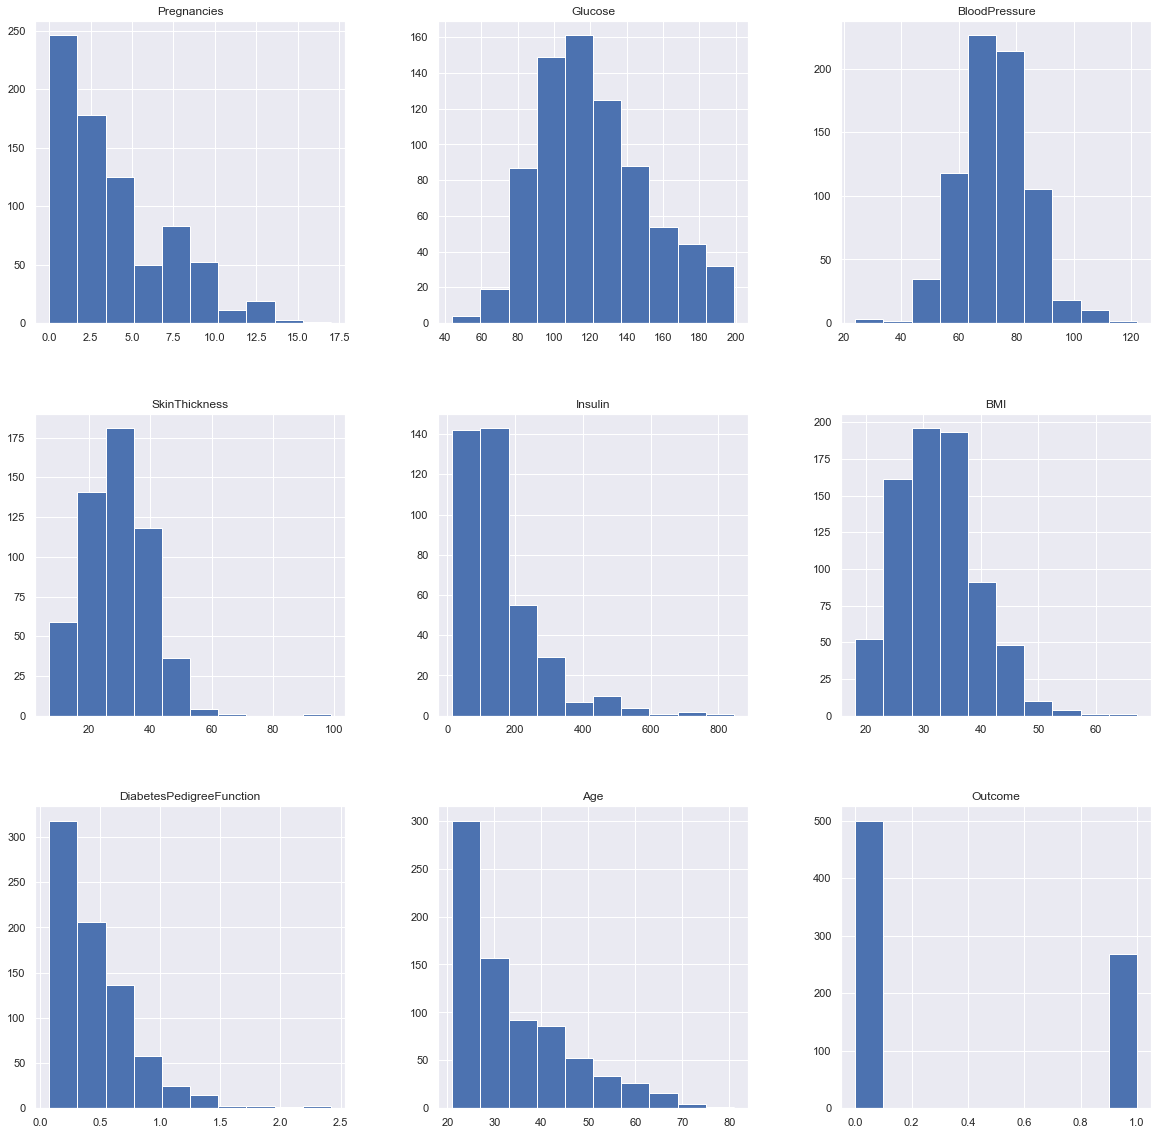

In [36]:
p = diabetes_data.hist(figsize = (20,20))

Aiming to impute nan values for the columns in accordance with their distribution

In [37]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

# Plotting after Nan removal

In [ ]:
KNeighbourClassifier(n_neighbours = 5)

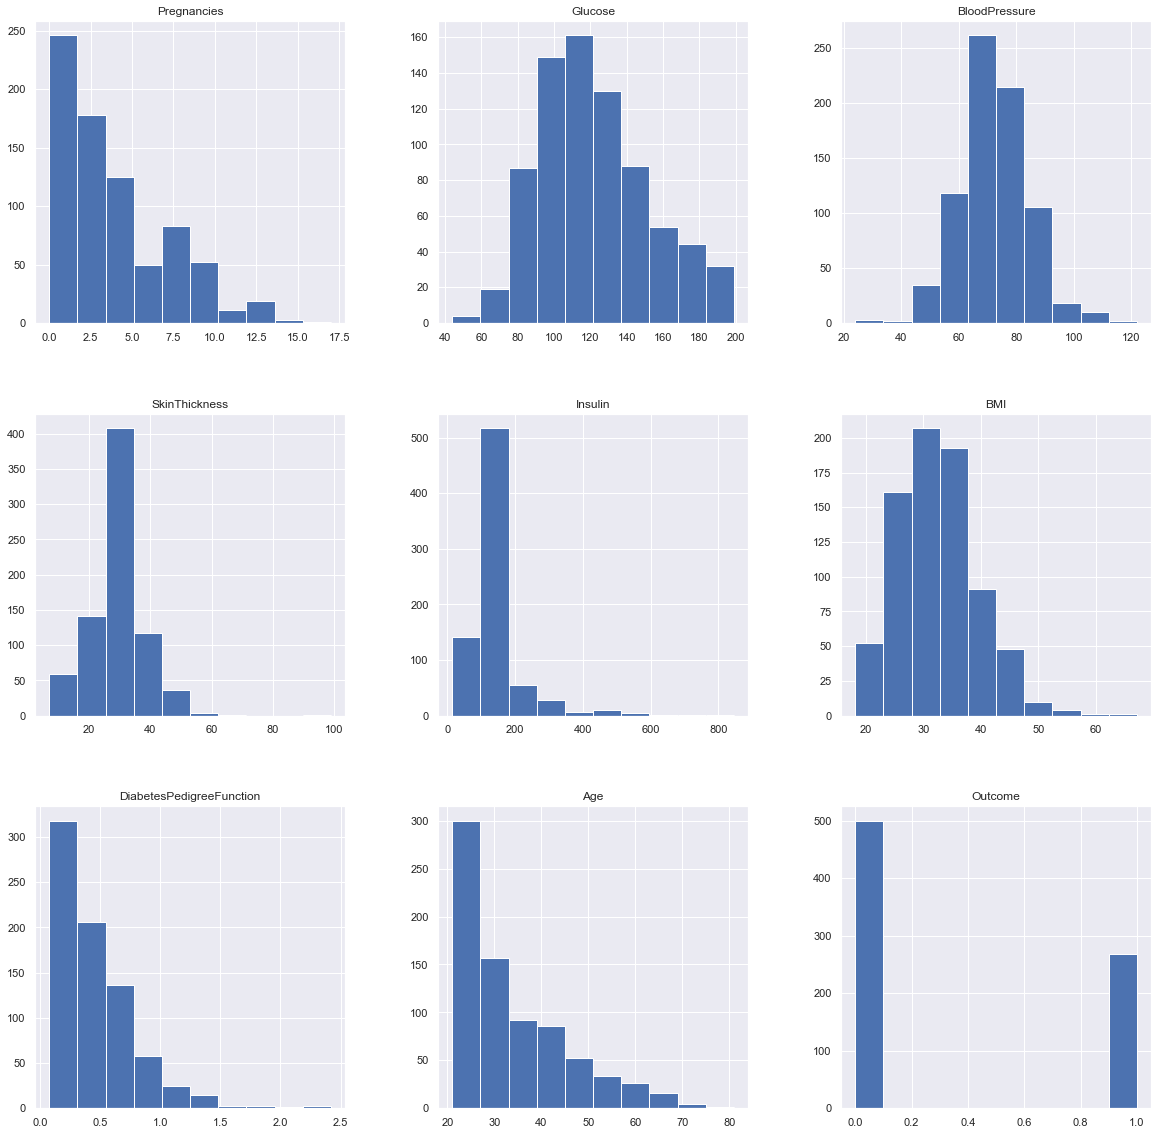

In [38]:
p = diabetes_data_copy.hist(figsize = (20,20))